In [273]:
import numpy as np
import pandas as pd
dengue= pd.read_csv('/Users/eroolpal/Downloads/denguebystation - Sheet1.csv', 
                  names = [ "Jan", "Feb", "Mar", "Apr", "May","Jun", "Jul", "Aug","Sep", "Oct", "Nov", "Dec", "Tot"])
weather= pd.read_csv('/Users/eroolpal/Downloads/1724265.csv')


In [214]:
dengue.head(30)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Tot
Colombo,584,606,294,224,296,700,1530,881,312,267,97,146,5937
Gampaha,608,623,306,205,295,381,686,417,174,101,77,87,3960
Kalutara,121,124,119,114,185,294,420,215,122,56,23,19,1812
Kandy,211,174,116,89,114,176,341,230,91,64,22,16,1644
Matale,138,113,35,46,35,35,97,43,23,21,19,45,650
N Eliya,28,11,15,6,14,13,45,44,21,21,6,3,227
Galle,36,79,86,115,83,145,228,169,105,49,11,7,1113
Hambantota,49,128,85,45,29,82,161,122,67,24,7,10,809
Matara,36,44,41,29,28,67,148,110,62,25,15,9,614
Jaffna,858,878,170,145,82,237,236,96,40,78,79,121,3020


In [378]:

#w1=weather.drop(['NUWARA ELIYA, CE'])
w1=weather[weather.NAME != 'NUWARA ELIYA, CE']
#weather.head(1000)
w1.head(1000)


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CLDD,DP01,DP10,...,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
0,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-01,NaN,NaN,5,2,...,NaN,NaN,0.59,NaN,NaN,NaN,0.80,NaN,NaN,NaN
1,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-02,NaN,NaN,4,1,...,13.0,NaN,0.11,95.0,NaN,NaN,0.21,NaN,90.5,NaN
2,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-03,NaN,NaN,7,4,...,19.0,NaN,0.70,94.0,NaN,NaN,1.20,NaN,90.4,NaN
3,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-04,NaN,NaN,20,13,...,16.0,NaN,4.61,91.0,NaN,NaN,17.37,NaN,89.9,NaN
4,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-05,NaN,NaN,23,16,...,9.0,NaN,5.31,92.0,NaN,NaN,31.00,NaN,88.6,NaN
5,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-06,NaN,NaN,16,11,...,0.0,NaN,2.33,89.0,NaN,NaN,7.24,NaN,87.3,NaN
6,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-07,NaN,NaN,16,8,...,0.0,NaN,1.38,88.0,NaN,NaN,4.59,NaN,85.9,NaN
7,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-08,NaN,NaN,2,2,...,0.0,NaN,0.40,88.0,NaN,NaN,0.58,NaN,85.5,NaN
8,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-09,NaN,NaN,15,10,...,0.0,NaN,4.89,88.0,NaN,NaN,10.69,NaN,86.0,NaN
9,CEM00043466,"COLOMBO, CE",6.900,79.867,7.0,2010-10,NaN,NaN,13,8,...,0.0,NaN,1.67,87.0,NaN,NaN,6.11,NaN,86.1,NaN


In [384]:
#w2=w1['NAME'].replace(['COLOMBO, CE'], 'Colombo')
mapping = {'COLOMBO, CE': 'Colombo', 'KURUNEGALA, CE': 'Kurunegala', 'CHINA BAY, CE': 'Trincomalee', 'PUTTALAM, CE': 'Puttalam'}
w2=w1.replace({'NAME': mapping})
w2.tail(100)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CLDD,DP01,DP10,...,DX90,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN
419,CEM00043424,Puttalam,8.033,79.833,2.0,2010-07,NaN,525.0,3,1,...,9.0,75.0,1.25,92.0,0.0,0.0,1.38,83.8,88.9,78.7
420,CEM00043424,Puttalam,8.033,79.833,2.0,2010-08,NaN,501.0,2,1,...,5.0,73.0,2.01,91.0,0.0,0.0,2.07,82.7,87.3,78.1
421,CEM00043424,Puttalam,8.033,79.833,2.0,2010-09,NaN,520.0,8,7,...,3.0,74.0,6.87,91.0,0.0,0.0,9.73,83.0,88.0,77.9
422,CEM00043424,Puttalam,8.033,79.833,2.0,2010-10,NaN,445.0,9,2,...,0.0,73.0,1.89,89.0,0.0,0.0,3.60,82.1,86.7,77.5
423,CEM00043424,Puttalam,8.033,79.833,2.0,2010-11,NaN,NaN,23,18,...,0.0,71.0,3.03,90.0,NaN,NaN,12.94,80.2,86.3,74.1
424,CEM00043424,Puttalam,8.033,79.833,2.0,2010-12,NaN,NaN,21,15,...,0.0,69.0,2.99,89.0,NaN,NaN,13.96,78.2,83.7,72.7
425,CEM00043424,Puttalam,8.033,79.833,2.0,2011-01,343.0,343.0,13,6,...,0.0,65.0,0.99,88.0,NaN,0.0,3.04,77.3,84.2,70.4
426,CEM00043424,Puttalam,8.033,79.833,2.0,2011-02,662.0,320.0,10,7,...,2.0,68.0,1.14,90.0,NaN,0.0,3.76,78.7,86.0,71.4
427,CEM00043424,Puttalam,8.033,79.833,2.0,2011-03,1118.0,456.0,6,3,...,16.0,68.0,0.36,92.0,NaN,0.0,0.80,81.4,89.9,72.8
428,CEM00043424,Puttalam,8.033,79.833,2.0,2011-04,1587.0,468.0,16,10,...,20.0,72.0,1.18,93.0,NaN,0.0,6.28,82.4,89.8,75.1


In [239]:
#df1=(dengue.loc[dengue['city'].isin(['Colombo','Trincomalee', 'Kurunegala', 'Puttalam'])]).drop(['Tot'], axis=1)

df1=dengue.loc[['Colombo', 'Trincomalee','Kurunegala', 'Puttalam']].drop(['Tot'], axis=1)




In [240]:
#df1.drop(df1.index[0], inplace=True)
df1.head(30)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Colombo,584,606,294,224,296,700,1530,881,312,267,97,146
Colombo,309,392,340,528,698,1610,2085,824,863,599,536,1339
Colombo,1066,744,630,412,583,1251,1314,1231,525,726,853,682
Colombo,757,845,791,610,748,830,1168,1298,685,619,1173,1259
Colombo,1346,684,488,539,1744,2289,1859,1104,706,1089,1448,1415
Colombo,1802,1101,537,317,515,515,907,711,401,769,985,1321
Colombo,2184,1569,1016,942,693,1459,3191,1478,939,459,460,2377
Colombo,2734,1900,2467,2570,3333,5372,7471,3620,1251,823,1131,1602
Colombo,1177,622,475,403,615,1292,1568,1037,387,372,977,1333
Colombo,1225,792,815,579,0,0,0,0,0,0,0,0


In [243]:
df2=df1.T

In [244]:
df2.head(15)

,Colombo,Colombo,Colombo,Colombo,Colombo,Colombo,Colombo,Colombo,Colombo,Colombo,...,Puttalam,Puttalam,Puttalam,Puttalam,Puttalam,Puttalam,Puttalam,Puttalam,Puttalam,Puttalam
Jan,584,309,1066,757,1346,1802,2184,2734,1177,1225,...,208,72,131,175,93,256,206,196,537,79
Feb,606,392,744,845,684,1101,1569,1900,622,792,...,189,64,101,170,42,85,160,132,270,60
Mar,294,340,630,791,488,537,1016,2467,475,815,...,86,49,69,98,42,34,63,212,124,52
Apr,224,528,412,610,539,317,942,2570,403,579,...,50,28,55,67,27,20,74,318,61,27
May,296,698,583,748,1744,515,693,3333,615,0,...,51,21,98,53,34,32,53,612,103,0
Jun,700,1610,1251,830,2289,515,1459,5372,1292,0,...,106,52,178,56,83,42,87,783,96,0
Jul,1530,2085,1314,1168,1859,907,3191,7471,1568,0,...,137,62,98,46,101,65,144,1304,150,0
Aug,881,824,1231,1298,1104,711,1478,3620,1037,0,...,82,23,142,83,65,14,89,1192,31,0
Sep,312,863,525,685,706,401,939,1251,387,0,...,49,31,253,39,39,12,47,419,65,0
Oct,267,599,726,619,1089,769,459,823,372,0,...,31,27,159,31,84,23,17,501,107,0


In [391]:

#df3=df2.iloc[0:9,:]
#df4=df2.iloc[9:17,:]
#df5=df2.groupby(df2.columns.values, axis=1).agg(lambda x: x.values.tolist())
#df5=df2.pivot(columns='Colombo')
#df5=df2.stack()
df5=pd.melt(df2, id_vars = [], value_vars=['Colombo', 'Trincomalee', 'Kurunegala', 'Puttalam'])
#dff5=df5.rename(index=str, columns={"variable": "NAME"})
#df5= df3.T.append(df4.T)
#df5=df3.append(df4)
#df5=pd.concat([df3,df4])
#frames=[df3,df4]
#result = frames.concat()
#df.head()
#df = pd.DataFrame([[1, 2], [3, 4]])
#df.head()
#dff5.head(130)

,NAME,value
0,Colombo,584
1,Colombo,606
2,Colombo,294
3,Colombo,224
4,Colombo,296
5,Colombo,700
6,Colombo,1530
7,Colombo,881
8,Colombo,312
9,Colombo,267


In [364]:

days=pd.date_range('2010-01-01', '2019-12-31', freq='M', ).strftime('%Y-%m')
#days=pd.concat(pd.df5({'Start': pd.date_range('2010-01-01','2019-03-31', freq='M').strftime('%Y-%m'),variable,value}) 
#df_0 = pd.DataFrame(dict(year = i.year, month = i.month))
#df5['date'] = pandas.to_datetime(df5['date'], unit='s')
#df_0 = df_0.astype(str)
#pd.to_datetime(df.year + df.month, format="%Y%m")
#print(days)
dff = pd.DataFrame({'DATE': days})
print(dff)

        DATE
0    2010-01
1    2010-02
2    2010-03
3    2010-04
4    2010-05
5    2010-06
6    2010-07
7    2010-08
8    2010-09
9    2010-10
10   2010-11
11   2010-12
12   2011-01
13   2011-02
14   2011-03
15   2011-04
16   2011-05
17   2011-06
18   2011-07
19   2011-08
20   2011-09
21   2011-10
22   2011-11
23   2011-12
24   2012-01
25   2012-02
26   2012-03
27   2012-04
28   2012-05
29   2012-06
..       ...
90   2017-07
91   2017-08
92   2017-09
93   2017-10
94   2017-11
95   2017-12
96   2018-01
97   2018-02
98   2018-03
99   2018-04
100  2018-05
101  2018-06
102  2018-07
103  2018-08
104  2018-09
105  2018-10
106  2018-11
107  2018-12
108  2019-01
109  2019-02
110  2019-03
111  2019-04
112  2019-05
113  2019-06
114  2019-07
115  2019-08
116  2019-09
117  2019-10
118  2019-11
119  2019-12

[120 rows x 1 columns]


In [365]:
#newdf = pd.DataFrame(np.repeat(dff.values,4,axis=0))
#newdf = pd.DataFrame(np.tile(dff.values,4,axis=0))

newdf = pd.DataFrame(pd.np.tile(dff.values, (4, 1)))
newdf.columns = dff.columns
print(newdf)

        DATE
0    2010-01
1    2010-02
2    2010-03
3    2010-04
4    2010-05
5    2010-06
6    2010-07
7    2010-08
8    2010-09
9    2010-10
10   2010-11
11   2010-12
12   2011-01
13   2011-02
14   2011-03
15   2011-04
16   2011-05
17   2011-06
18   2011-07
19   2011-08
20   2011-09
21   2011-10
22   2011-11
23   2011-12
24   2012-01
25   2012-02
26   2012-03
27   2012-04
28   2012-05
29   2012-06
..       ...
450  2017-07
451  2017-08
452  2017-09
453  2017-10
454  2017-11
455  2017-12
456  2018-01
457  2018-02
458  2018-03
459  2018-04
460  2018-05
461  2018-06
462  2018-07
463  2018-08
464  2018-09
465  2018-10
466  2018-11
467  2018-12
468  2019-01
469  2019-02
470  2019-03
471  2019-04
472  2019-05
473  2019-06
474  2019-07
475  2019-08
476  2019-09
477  2019-10
478  2019-11
479  2019-12

[480 rows x 1 columns]


df4.head()

In [398]:
#df6=df5.['Colombo',:]
df6 = df5[df5.value != 0]
#df6 = df5[(df5 != 0)]
#df6=df5[paste0('Colombo',:]
#df6['Colombo'].apply(len)
print(df6)

     variable  value
0     Colombo    584
1     Colombo    606
2     Colombo    294
3     Colombo    224
4     Colombo    296
5     Colombo    700
6     Colombo   1530
7     Colombo    881
8     Colombo    312
9     Colombo    267
10    Colombo     97
11    Colombo    146
12    Colombo    309
13    Colombo    392
14    Colombo    340
15    Colombo    528
16    Colombo    698
17    Colombo   1610
18    Colombo   2085
19    Colombo    824
20    Colombo    863
21    Colombo    599
22    Colombo    536
23    Colombo   1339
24    Colombo   1066
25    Colombo    744
26    Colombo    630
27    Colombo    412
28    Colombo    583
29    Colombo   1251
..        ...    ...
442  Puttalam     26
443  Puttalam     80
444  Puttalam    196
445  Puttalam    132
446  Puttalam    212
447  Puttalam    318
448  Puttalam    612
449  Puttalam    783
450  Puttalam   1304
451  Puttalam   1192
452  Puttalam    419
453  Puttalam    501
454  Puttalam   1037
455  Puttalam   1135
456  Puttalam    537
457  Puttalam

In [399]:
df7=pd.concat([newdf,df6],axis=1)
df7.tail(130)

,DATE,variable,value
350,2019-03,Kurunegala,148.0
351,2019-04,Kurunegala,111.0
352,2019-05,NaN,NaN
353,2019-06,NaN,NaN
354,2019-07,NaN,NaN
355,2019-08,NaN,NaN
356,2019-09,NaN,NaN
357,2019-10,NaN,NaN
358,2019-11,NaN,NaN
359,2019-12,NaN,NaN


In [405]:
dff7=df7.rename(index=str, columns={"variable": "NAME"})
dff7.head(140)

,DATE,NAME,value
0,2010-01,Colombo,584.0
1,2010-02,Colombo,606.0
2,2010-03,Colombo,294.0
3,2010-04,Colombo,224.0
4,2010-05,Colombo,296.0
5,2010-06,Colombo,700.0
6,2010-07,Colombo,1530.0
7,2010-08,Colombo,881.0
8,2010-09,Colombo,312.0
9,2010-10,Colombo,267.0


In [452]:
#merge w2 and df7
#result = pd.concat([w2, df7], axis=1, join_axes=[w2.index])
#s1 = pd.merge(w2, df7, how='inner', on=['NAME'])

s1 = pd.merge(w2, dff7, how='left', on=['DATE', 'NAME'])
s1.tail(50)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CLDD,DP01,DP10,...,EMNT,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN,value
363,CEM00043424,Puttalam,8.033,79.833,2.0,2014-09,NaN,493.0,8,6,...,74.0,1.43,92.0,0.0,0.0,4.18,83.2,88.3,78.1,39.0
364,CEM00043424,Puttalam,8.033,79.833,2.0,2014-10,NaN,NaN,21,14,...,NaN,2.05,91.0,NaN,NaN,10.00,NaN,88.0,NaN,84.0
365,CEM00043424,Puttalam,8.033,79.833,2.0,2014-11,NaN,363.0,20,14,...,71.0,2.48,90.0,NaN,0.0,12.54,79.5,85.5,73.5,147.0
366,CEM00043424,Puttalam,8.033,79.833,2.0,2014-12,NaN,NaN,22,21,...,69.0,3.13,90.0,NaN,NaN,18.28,78.9,84.3,73.5,159.0
367,CEM00043424,Puttalam,8.033,79.833,2.0,2015-01,NaN,NaN,3,3,...,NaN,0.24,90.0,NaN,NaN,0.55,NaN,87.4,NaN,256.0
368,CEM00043424,Puttalam,8.033,79.833,2.0,2015-02,NaN,NaN,7,4,...,NaN,0.63,92.0,NaN,NaN,1.30,NaN,88.9,NaN,85.0
369,CEM00043424,Puttalam,8.033,79.833,2.0,2015-03,NaN,NaN,6,5,...,NaN,1.09,97.0,NaN,NaN,2.18,NaN,93.4,NaN,34.0
370,CEM00043424,Puttalam,8.033,79.833,2.0,2015-05,NaN,NaN,9,8,...,NaN,1.54,92.0,NaN,NaN,4.01,NaN,89.7,NaN,32.0
371,CEM00043424,Puttalam,8.033,79.833,2.0,2015-06,NaN,NaN,13,7,...,76.0,0.32,91.0,NaN,NaN,1.79,84.6,89.6,79.6,42.0
372,CEM00043424,Puttalam,8.033,79.833,2.0,2015-07,NaN,NaN,1,0,...,77.0,0.02,93.0,NaN,NaN,0.02,84.9,89.4,80.4,65.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e636630>,
      dtype=object)

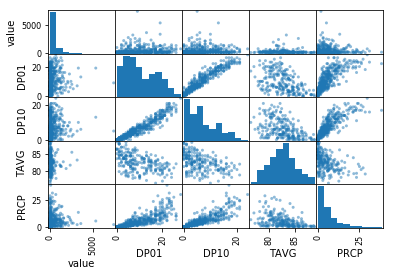

In [412]:
#data Visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes=["value","DP01","DP10","TAVG","PRCP"]
scatter_matrix(s1[attributes])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f919f60>,
      dtype=object)

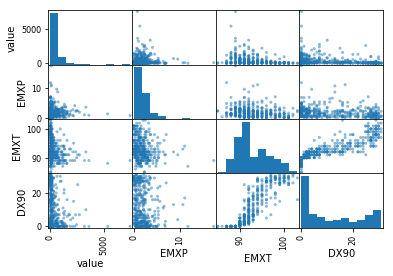

In [413]:
attributes1=["value","EMXP","EMXT","DX90"]
scatter_matrix(s1[attributes1])

In [416]:
s1.max()

STATION      CEM00043466
NAME         Trincomalee
LATITUDE           8.539
LONGITUDE         81.182
ELEVATION            116
DATE             2019-02
CDSD                5900
CLDD                 666
DP01                  28
DP10                  24
DT00                   0
DT32                   0
DX32                   0
DX70                  31
DX90                  31
EMNT                  79
EMXP               17.44
EMXT                 103
HDSD                   0
HTDD                   0
PRCP               38.22
TAVG                88.7
TMAX                98.7
TMIN                81.6
value               7471
dtype: object

In [418]:
corr_matrix= s1.corr()

In [419]:
corr_matrix['value'].sort_values(ascending=False)

value        1.000000
DP01         0.104320
DP10         0.066623
TMIN         0.065013
CDSD         0.036987
EMNT        -0.002603
PRCP        -0.008001
EMXP        -0.028354
TAVG        -0.036649
CLDD        -0.053089
DX70        -0.055889
ELEVATION   -0.117214
TMAX        -0.189298
EMXT        -0.262352
DX90        -0.275675
LONGITUDE   -0.328226
LATITUDE    -0.534717
DT00              NaN
DT32              NaN
DX32              NaN
HDSD              NaN
HTDD              NaN
Name: value, dtype: float64

(array([ 2., 16.,  9., 12., 15., 13., 12.,  6.,  5., 10.,  8.,  9., 12.,
         8.,  5.,  7.,  9.,  5.,  4., 15.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

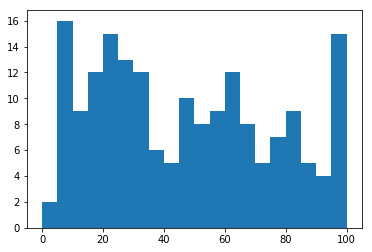

In [426]:
plt.hist(s1["value"],20, range=[0,100])

(200, 1000)

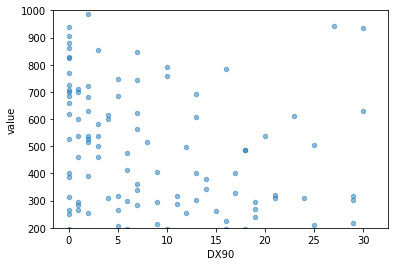

In [434]:

s1.plot(kind="scatter", x="DX90", y="value", alpha=0.5)
plt.ylim(200, 1000)

(100, 5000)

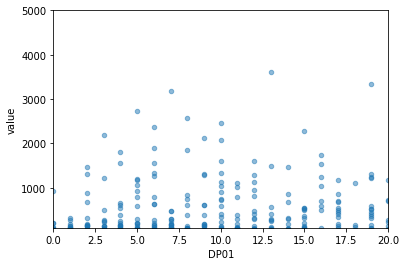

In [442]:
s1.plot(kind="scatter", x="DP01", y="value", alpha=0.5)
plt.xlim(0, 20)
plt.ylim(100,5000)


In [473]:
 #s1['Month'] = DatetimeIndex(s1['DATE']).month
#s1['month']=s1.DATE[-2:]
s1['month']=s1['DATE'].str[-2:]
#print(s1['DATE'].astype(str).str[-1])
#print(s1.str.slice(start=5))

In [476]:
s1['month'] = s1['month'].astype(float)
s1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,CDSD,CLDD,DP01,DP10,...,EMXP,EMXT,HDSD,HTDD,PRCP,TAVG,TMAX,TMIN,value,month
0,CEM00043466,Colombo,6.9,79.867,7.0,2010-01,NaN,NaN,5,2,...,0.59,NaN,NaN,NaN,0.80,NaN,NaN,NaN,584.0,1.0
1,CEM00043466,Colombo,6.9,79.867,7.0,2010-02,NaN,NaN,4,1,...,0.11,95.0,NaN,NaN,0.21,NaN,90.5,NaN,606.0,2.0
2,CEM00043466,Colombo,6.9,79.867,7.0,2010-03,NaN,NaN,7,4,...,0.70,94.0,NaN,NaN,1.20,NaN,90.4,NaN,294.0,3.0
3,CEM00043466,Colombo,6.9,79.867,7.0,2010-04,NaN,NaN,20,13,...,4.61,91.0,NaN,NaN,17.37,NaN,89.9,NaN,224.0,4.0
4,CEM00043466,Colombo,6.9,79.867,7.0,2010-05,NaN,NaN,23,16,...,5.31,92.0,NaN,NaN,31.00,NaN,88.6,NaN,296.0,5.0


In [479]:
corr_matrix= s1.corr()
corr_matrix['value'].sort_values(ascending=False)

value        1.000000
DP01         0.104320
DP10         0.066623
TMIN         0.065013
CDSD         0.036987
EMNT        -0.002603
PRCP        -0.008001
month       -0.014329
EMXP        -0.028354
TAVG        -0.036649
CLDD        -0.053089
DX70        -0.055889
ELEVATION   -0.117214
TMAX        -0.189298
EMXT        -0.262352
DX90        -0.275675
LONGITUDE   -0.328226
LATITUDE    -0.534717
DT00              NaN
DT32              NaN
DX32              NaN
HDSD              NaN
HTDD              NaN
Name: value, dtype: float64

(1000, 8000)

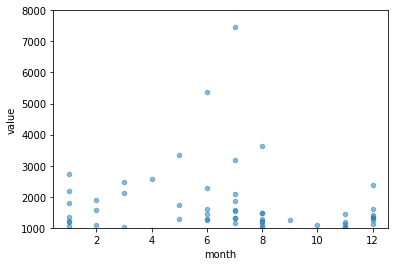

In [484]:
s1.plot(kind="scatter", x="month", y="value", alpha=0.5)
plt.ylim(1000,8000)